In [124]:
import matplotlib
import numpy as np
from scipy import *
from sympy import *
init_printing(use_unicode=True)

In [125]:
# Primera aproximacion a el calculo simbolico con sympy
def simple(o1,o2):
    t1,t2=symbols('t%d t%d'%(o1,o2))
    denominador=(t1-t2)**o1
    numerador=(t1+t2)**o2
    division=div(numerador, denominador)
    return division

In [126]:
simple(5,7)

In [127]:
# Segunda aproximacion a sympy
def simple2(n):
    x=var('t%d'%n)
    return x**n

In [128]:
simple2(4)

In [134]:
# Primer punto de la tarea parte a
def legendre(orden):
    # Se asigna un valor simbolico a la as variable t y h  
    t=var('t')
    h=var('h')
    
    # Se declaran dos arreglos uno para los valores de f y sus subindices, lo mismo para t
    F=[]
    T=[]
    
    # Se inicializa los valores de t y f segun el orden que entro por parametro
    for i in range(orden):
        F.append(var('f%d'%i))
        T.append(var('t%d'%i))
    
    # Se inicializa la variable d la expresion para el polinomio 
    adam=0
    for n in range(orden):
        adamParcial=F[n]
        for i in range(orden):
            if i!=n:
                adamParcial=adamParcial*(t-T[i])/(T[n]-T[i])   
        adam=adam+adamParcial
    return adam

    
   
    

In [162]:
# segundo punto a partir de modificar un poco el metodo anterior
def adams1(orden):
    # Se asigna un valor simbolico a la as variable t y h  
    t=var('t')
    h=var('h')
    
    # Se declaran dos arreglos uno para los valores de f y sus subindices, lo mismo para t
    F=[]
    T=[]
    
    # Se inicializa los valores de t y f segun el orden que entro por parametro
    for i in range(orden):
        F.append(var('f%d'%i))
        T.append(var('t%d'%i))
    print T[0]
    # Se inicializa la variable d la expresion para el polinomio 
    adam=0
    for n in range(orden):
        for k in range(1,orden):
            T[k]=T[0]-(h*k)
        adamParcial=F[n]
        for i in range(orden):
            if i!=n:
                adamParcial=adamParcial*(t-T[i])/(T[n]-T[i])   
        adam=adam+adamParcial
    
    legendre=integrate(adam,(t,T[0],T[0]+h))
    return simplify(legendre)

In [212]:
def adams(order):
    h=var('h')
    adam=legendre(order)
    variable=[]
    replace=[]
    for l in range(1,order):
        variable.append(var('t%d'%l))
        replace.append(t0-l*h)
    for k in range(1,order):
        adam=adam.xreplace({variable[k-1]:replace[k-1]})
    adams=integrate(adam,(t,t0,t0+h))
    return simplify(adams)

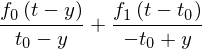

In [210]:
# Aproximacion a la funcion xreplace de sympy
adam=legendre(2)
H=[t,t1,t2]
r=[t0-2*h,y]
adam.xreplace({H[1]:r[1]})

[t1] [-h + t0]
[t1, t2] [-h + t0, -2*h + t0]


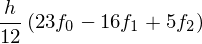

In [211]:
adams(3)

In [158]:
def prueba2 (orden):
    separable=legendre(orden)
    print separable
    s= separable.xreplace({t1: 2})
    return s

In [159]:
t=(x**2 + x**4)
print t
t.xreplace({x: y})
print t
#t=x**2+y**2
#t.subs(x,y)
#print t

x**4 + x**2
x**4 + x**2


f0*(t - t1)/(t0 - t1) + f1*(t - t0)/(-t0 + t1)


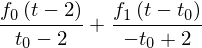

In [160]:
prueba2(2)

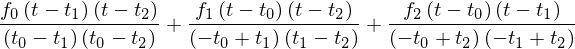

In [92]:
prueba2(3)

In [21]:
x,y=symbols('x,y')
Add(x,y)

In [7]:
def adams(orden):
    for k in range(1,orden):
            T[k]=T[0]-(h*k)
    adam=legendre(orden)
    adam=integrate(legendre,(t,T[0],T[0]+h))
    return simplify(adam)

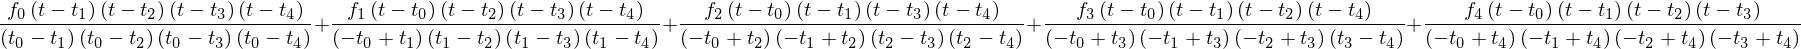

In [213]:
legendre(5)

In [31]:
def prueba (n):
    s=[]
    for i in range(n):
        s.append(var('d%d'%i))
    return s


In [32]:
prueba(4)

In [11]:
t=var('t')

In [136]:
var('t%d'%5)

In [1]:
def cosas(i):
    mensaje =('Tn%d'%(i))
    
    print mensaje



In [2]:
cosas(10)

Tn10


In [ ]:
var